In [1]:
import pandas as pd

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
df = pd.read_csv('new_data.csv')

In [10]:
df.Date = pd.to_datetime(df.Date)

In [26]:
#new_df = df[(df['Date'] > '2020-01-01') & (df['Date'] < '2020-05-31')].copy()
#new_df.reset_index()

index                                          Headlines  \
0       89  home24 SE: home24 SE subsidiary Mobly S.A. pre...   
1       90  EQS Group AG successfully concludes capital in...   
2       91  DEAG Deutsche Entertainment Aktiengesellschaft...   
3       92      EQS Group AG decides on 5 % capital increase    
4       93  Achiko partners with Udayana University for Co...   
..     ...                                                ...   
507   1212  Sixt SE: Statement of Sixt SE regarding report...   
508   1213  ADVA Optical Networking SE expects profit redu...   
509   1214  METRO AG concluded purchase agreement regardin...   
510   1215  Leclanché Secures Convertible Loan Facility of...   
511   1216  adesso SE: Sales and EBITDA forecasts for 2019...   

                                                  Text                Date  \
0     Berlin - home24 SE ("home24", the "Company") ... 2020-04-12 17:53:00   
1     EQS Group AG successfully concludes capital i... 2020-04-12 16:20:00   
2     Publication of inside information pursuant to... 2020-04-12 13:00:00   
3     EQS Group AG decides on 5 % capital increase\... 2020-04-12 08:51:00   
4     Achiko partners with Udayana University for C... 2020-04-12 06:12:00   
..                                                 ...                 ...   
507   Statement of Sixt SE regarding reports on a p... 2020-02-19 12:25:00   
508   Ad-hoc-release according to article 17 of the... 2020-02-18 21:22:00   
509   METRO AG ("METRO") concluded a notarized purc... 2020-02-18 21:01:00   
510     Leclanché Secures Convertible Loan Facility... 2020-02-18 06:59:00   
511   adesso SE: Sales and EBITDA forecasts for 201... 2020-02-17 17:52:00   

                                       sentence_tokens  \
0    [' Berlin - home24 SE ("home24", the "Company"...   
1    [' EQS Group AG successfully concludes capital...   
2    [' Publication of inside information pursuant ...   
3    [' EQS Group AG decides on 5 % capital increas...   
4    [' Achiko partners with Udayana University for...   
..                                                 ...   
507  [' Statement of Sixt SE regarding reports on a...   
508  [' Ad-hoc-release according to article 17 of t...   
509  [' METRO AG ("METRO") concluded a notarized pu...   
510  [' \xa0 Leclanché Secures Convertible Loan Fac...   
511  [' adesso SE: Sales and EBITDA forecasts for 2...   

                                     preprocessed_sent  \
0    [' Berlin  home24 SE home24 the Company is pre...   
1    [' EQS Group AG successfully concludes capital...   
2    [' Publication of inside information pursuant ...   
3    [' EQS Group AG decides on 5  capital increase...   
4    [' Achiko partners with Udayana University for...   
..                                                 ...   
507  [' Statement of Sixt SE regarding reports on a...   
508  [' Adhocrelease according to article 17 of the...   
509  [' METRO AG METRO concluded a notarized purcha...   
510  [' \xa0 Leclanché Secures Convertible Loan Fac...   
511  [' adesso SE Sales and EBITDA forecasts for 20...   

                                           word_tokens  \
0    [['Berlin', 'home24', 'SE', 'home24', 'the', '...   
1    [['EQS', 'Group', 'AG', 'successfully', 'concl...   
2    [['Publication', 'of', 'inside', 'information'...   
3    [['EQS', 'Group', 'AG', 'decides', 'on', '5', ...   
4    [['Achiko', 'partners', 'with', 'Udayana', 'Un...   
..                                                 ...   
507  [['Statement', 'of', 'Sixt', 'SE', 'regarding'...   
508  [['Adhocrelease', 'according', 'to', 'article'...   
509  [['METRO', 'AG', 'METRO', 'concluded', 'a', 'n...   
510  [['Leclanché', 'Secures', 'Convertible', 'Loan...   
511  [['adesso', 'SE', 'Sales', 'and', 'EBITDA', 'f...   

                                          no_stopwords  word_counts  \
0    ['Berlin', 'home24', 'SE', 'home24', 'the', 'C...          351   
1    ['EQS', 'Group', 'AG', 'successfully', 'conclu...

In [134]:
new_df = df

In [135]:
stuff = ["covid" "covid-19", "corona", "epidemic","pandemic"]

In [136]:
import ast
corona_words = []
for sent in new_df['word_tokens']:
    sents = ast.literal_eval(sent)  
    cnts = 0
    for sent in sents:
        for w in sent:
            if w.lower() in stuff:
                cnts = 1
                break
    corona_words.append(cnts)
new_df['corona_words'] = corona_words

In [137]:
new_df['corona_words'].describe()

count    1217.000000
mean        0.330320
std         0.470522
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: corona_words, dtype: float64

In [138]:
dics_total_docs = dict()
dics_corona_docs = dict()
for month in set(new_df['Date'].dt.month):
    subset_df = new_df[new_df['Date'].dt.month == month]
    dics_total_docs[month] = len(subset_df)
    dics_corona_docs[month] = sum(subset_df['corona_words'].to_list())
    

In [139]:
dics_total_docs

{1: 23,
 2: 92,
 3: 178,
 4: 140,
 5: 79,
 6: 99,
 7: 132,
 8: 94,
 9: 100,
 10: 128,
 11: 78,
 12: 74}

In [140]:
x = np.array(list(dics_total_docs.keys()))
y = dics_total_docs.values()
z = dics_corona_docs.values()

In [141]:
X_axis = np.arange(len(x))


In [142]:
months =  ['January','February','March',"April","May","June","July","August","September","October","November","December"]

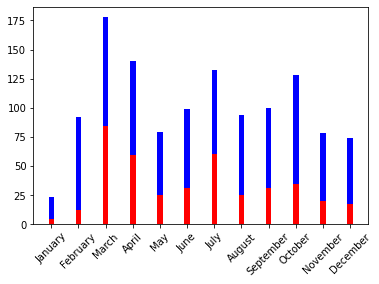

In [145]:
ax = plt.subplot(111)
ax.bar(X_axis, y, width=0.2, color='blue', align='center')
ax.bar(X_axis, z, width=0.2, color='red', align='center')
plt.xticks(X_axis,months,rotation=45)
plt.savefig('corona-months-dist.png',dpi=300)
#ax.xaxis_date()


In [148]:
corona_stats_df

Month  Total_docs  Corona_docs         %
0     January          23            4  0.173913
1    February          92           12  0.130435
2       March         178           84  0.471910
3       April         140           59  0.421429
4         May          79           25  0.316456
5        June          99           31  0.313131
6        July         132           60  0.454545
7      August          94           25  0.265957
8   September         100           31  0.310000
9     October         128           34  0.265625
10   November          78           20  0.256410
11   December          74           17  0.229730

In [147]:
xss = ['Month','Total_docs','Corona_docs','%']
yss = []

for idx in range(len(months)):
    #print(month)
    month = months[idx]
    total_docs = dics_total_docs[idx+1]
    corona_docs = dics_corona_docs[idx+1]
    yss.append((month,total_docs, corona_docs,corona_docs/total_docs))
    
corona_stats_df = pd.DataFrame(yss)
corona_stats_df.columns = xss
    